In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('glassdoor_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly_salary,min_salary,max_salary,avg_salary
0,Principal Data Scientist Demand Planning Virtu...,120-189,Abbott Nutrition Virtual Hiring Event - Columb...,3.7,Abbott Nutrition,"Columbus, OH",10000+ Employees,1888.0,Company - Public,Health Care Services & Hospitals,Health Care,$10+ billion (USD),0,120,189,154.5
1,Staff Data Scientist I,127-203,Data Scientist – Machine Learning & Real-Time ...,3.4,Valassis,"Morrisville, NC",1001 to 5000 Employees,1970.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,127,203,165.0
2,Supply Chain Data Analyst Virtual Hiring Event,37-72,KISS Products Virtual Hiring Event!\r\n\r\nEve...,2.5,"KISS products, Inc.","Piscataway, NJ",501 to 1000 Employees,1989.0,Company - Private,Consumer Products Manufacturing,Manufacturing,$100 to $500 million (USD),0,37,72,54.5
3,Junior Data Scientist,50-87,Junior Data Scientist\r\nLocation\r\n\r\n\r\nA...,2.5,Purchasing Power,"Atlanta, GA",201 to 500 Employees,2001.0,Company - Private,Financial Transaction Processing,Finance,$100 to $500 million (USD),0,50,87,68.5
4,Data Scientist - DAB,83-144,"By clicking the “Apply” button, I understand t...",3.7,Takeda Pharmaceutical,"Cambridge, MA",10000+ Employees,1781.0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),0,83,144,113.5


In [6]:
df.shape

(854, 16)

In [8]:
df.isnull().sum().sort_values(ascending=False)

Founded              50
Sector                7
Industry              7
Rating                1
avg_salary            0
max_salary            0
min_salary            0
hourly_salary         0
Revenue               0
Type of ownership     0
Size                  0
Location              0
Company Name          0
Job Description       0
Salary Estimate       0
Job Title             0
dtype: int64

## Job Title

In [10]:
df['Job Title'].value_counts().reset_index().set_index('index')

,Job Title
index,
Data Scientist,119
Data Engineer,30
Data Analyst,14
Senior Data Scientist,14
Machine Learning Engineer,10
...,...
Data Scientist - Consumer Product - Metrics Team,1
Azure Databricks Data Engineer,1
SENIOR/PRINCIPAL FORMULATION SCIENTIST,1


In [12]:
def job_type(job_title):
    if 'data scientist' in job_title.lower() or 'data science' in job_title.lower():
        return 'data scientist'
    elif 'data engineer' in job_title.lower() or 'data engineering' in job_title.lower():
        return 'data engineer'
    elif 'data analyst' in job_title.lower() or 'data analytics' in job_title.lower():
        return 'data analyst'
    elif 'business intelligence' in job_title.lower():
        return 'business intelligence'
    elif 'machine learning' in job_title.lower():
        return 'machine learning'
    else:
        return 'other'

In [14]:
def seniority(title):
    if 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'analyst' in title.lower():
        return 'analyst'
    else:
        return 'other'

In [16]:
df['job_type'] = df['Job Title'].apply(job_type)
df['seniority'] = df['Job Title'].apply(seniority)

In [18]:
df['job_type'].value_counts().reset_index().set_index('index')

,job_type
index,
data scientist,476
other,155
data analyst,99
data engineer,74
machine learning,29
business intelligence,21


In [20]:
df['seniority'].value_counts().reset_index().set_index('index')

,seniority
index,
other,555
senior,179
analyst,90
director,15
manager,15


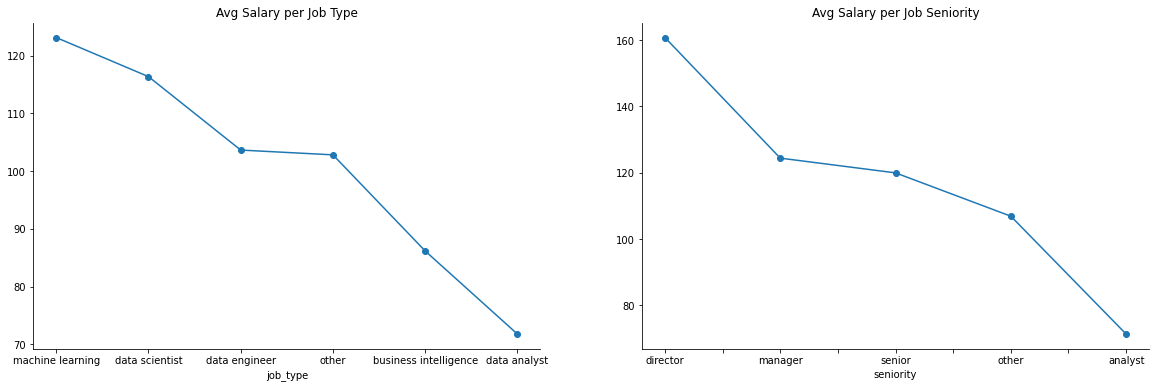

In [22]:
fig, axs = plt.subplots(1,2,figsize=(20,6))

axs[0].set_title('Avg Salary per Job Type')
df.groupby(by=['job_type']).mean()['avg_salary'].sort_values(ascending = False).plot(kind='line', marker='o', ax = axs[0])

axs[1].set_title('Avg Salary per Job Seniority')
df.groupby(by=['seniority']).mean()['avg_salary'].sort_values(ascending = False).plot(kind='line', marker='o', ax=axs[1])

sns.despine()

## Job Description

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
nltk.download('stopwords');
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Miguel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = [w for w in text.split() if not w in stop_words]
    text = ' '.join(words)
    return text

In [28]:
df['cleaned_description'] = df['Job Description'].apply(clean_text)

In [30]:
cv = CountVectorizer(ngram_range=(1, 2), min_df = 0.1, max_df= 0.9)
cv.fit(df['cleaned_description'].values);

In [32]:
d = cv.vocabulary_
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
d

{'years relevant': 751,
 'years experience': 750,
 'years': 749,
 'year': 748,
 'www': 747,
 'written verbal': 746,
 'written communication': 745,
 'written': 744,
 'writing': 743,
 'write': 742,
 'would': 741,
 'world': 740,
 'works': 739,
 'workplace': 738,
 'working': 737,
 'work experience': 736,
 'work environment': 735,
 'work closely': 734,
 'without regard': 733,
 'without': 732,
 'within': 731,
 'wide': 730,
 'well': 729,
 'web': 728,
 'ways': 727,
 'way': 726,
 'want': 725,
 'visualizations': 724,
 'visualization': 723,
 'visit': 722,
 'vision': 721,
 'via': 720,
 'veteran status': 719,
 'veteran': 718,
 'verbal written': 717,
 'verbal': 716,
 'various': 715,
 'variety': 714,
 'values': 713,
 'value': 712,
 'validation': 711,
 'using': 710,
 'users': 709,
 'user': 708,
 'used': 707,
 'use': 706,
 'us': 705,
 'unstructured': 704,
 'united states': 703,
 'united': 702,
 'unique': 701,
 'understanding': 700,
 'understand': 699,
 'type': 698,
 'tuition': 697,
 'trends': 696,
 'tr

In [34]:
'''
requiremens for job:
    -SAS
    -XGBOOST
    -SCIKIT
    -PANDAS
    -AWS
    -REDSHIFT
    -APACHE
    -SPARK
    -HADOOP
    -NUMPY
    -SCIPY
    -PYSPARK
    -LINUX
    -JUPYTER
    -SQL
    -CLOUD
    -PYTHON
    -R
    -MATHEMATICS
    -STATISTICS
    -PHD
    -TABLEAU
''';

In [36]:
df['sas_flag'] = df['Job Description'].apply(lambda x: 1 if 'sas' in x.lower() else 0)
df['xgboost_flag'] = df['Job Description'].apply(lambda x: 1 if 'xgboost' in x.lower() else 0)
df['scikit_flag'] = df['Job Description'].apply(lambda x: 1 if 'scikit' in x.lower() else 0)
df['pandas_flag'] = df['Job Description'].apply(lambda x: 1 if 'pandas' in x.lower() else 0)
df['aws_flag'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df['redshift_flag'] = df['Job Description'].apply(lambda x: 1 if 'redshift' in x.lower() else 0)
df['apache_flag'] = df['Job Description'].apply(lambda x: 1 if 'apache' in x.lower() else 0)
df['spark_flag'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['hadoop_flag'] = df['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)
df['numpy_flag'] = df['Job Description'].apply(lambda x: 1 if 'numpy' in x.lower() else 0)
df['scipy_flag'] = df['Job Description'].apply(lambda x: 1 if 'scipy' in x.lower() else 0)
df['pyspark_flag'] = df['Job Description'].apply(lambda x: 1 if 'pyspark' in x.lower() else 0)
df['linux_flag'] = df['Job Description'].apply(lambda x: 1 if 'linux' in x.lower() else 0)
df['jupyter_flag'] = df['Job Description'].apply(lambda x: 1 if 'jupyter' in x.lower() else 0)
df['sql_flag'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['cloud_flag'] = df['Job Description'].apply(lambda x: 1 if 'cloud' in x.lower() else 0)
df['python_flag'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['phd_flag'] = df['Job Description'].apply(lambda x: 1 if 'phd' in x.lower() else 0)
df['tableau_flag'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

In [38]:
columns = ['sas_flag','xgboost_flag','scikit_flag','pandas_flag','aws_flag','redshift_flag', \
           'apache_flag','spark_flag','hadoop_flag','numpy_flag','scipy_flag','pyspark_flag','linux_flag',\
           'jupyter_flag','sql_flag','cloud_flag','python_flag','phd_flag','tableau_flag']

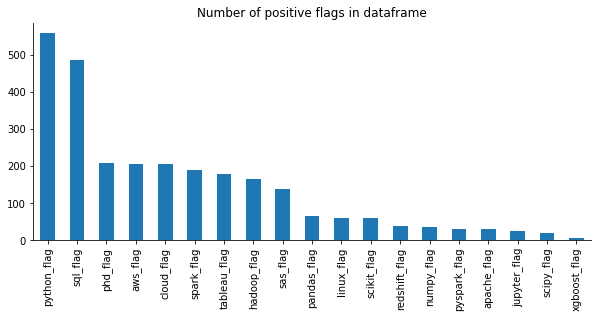

In [40]:
plt.figure(figsize=(10,4))
plt.title('Number of positive flags in dataframe')
df[columns].sum().sort_values(ascending=False).plot(kind='bar')
sns.despine()

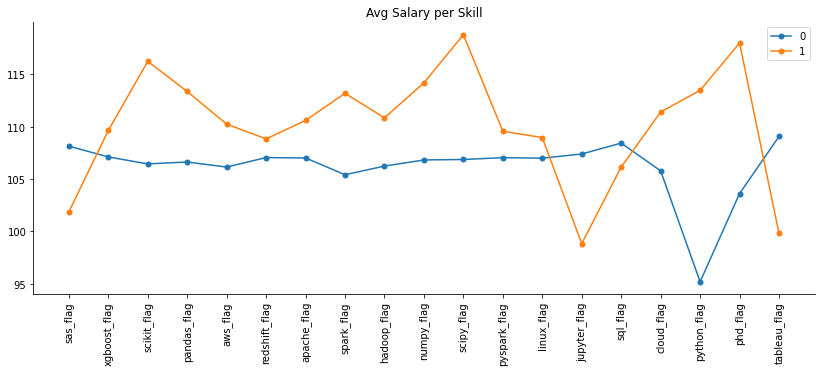

In [42]:
a = []
b = []
c= []
for col in columns:
    a.append(col)
    b.append( df.groupby(col).mean()['avg_salary'].values[0] )
    c.append( df.groupby(col).mean()['avg_salary'].values[1] )

pd.DataFrame({'0':b, '1':c}, index=a).plot(kind='line', rot=90, figsize=(14,5), marker='o', markersize=5, title='Avg Salary per Skill')
plt.xticks(ticks=np.arange(19), labels=a);
sns.despine()

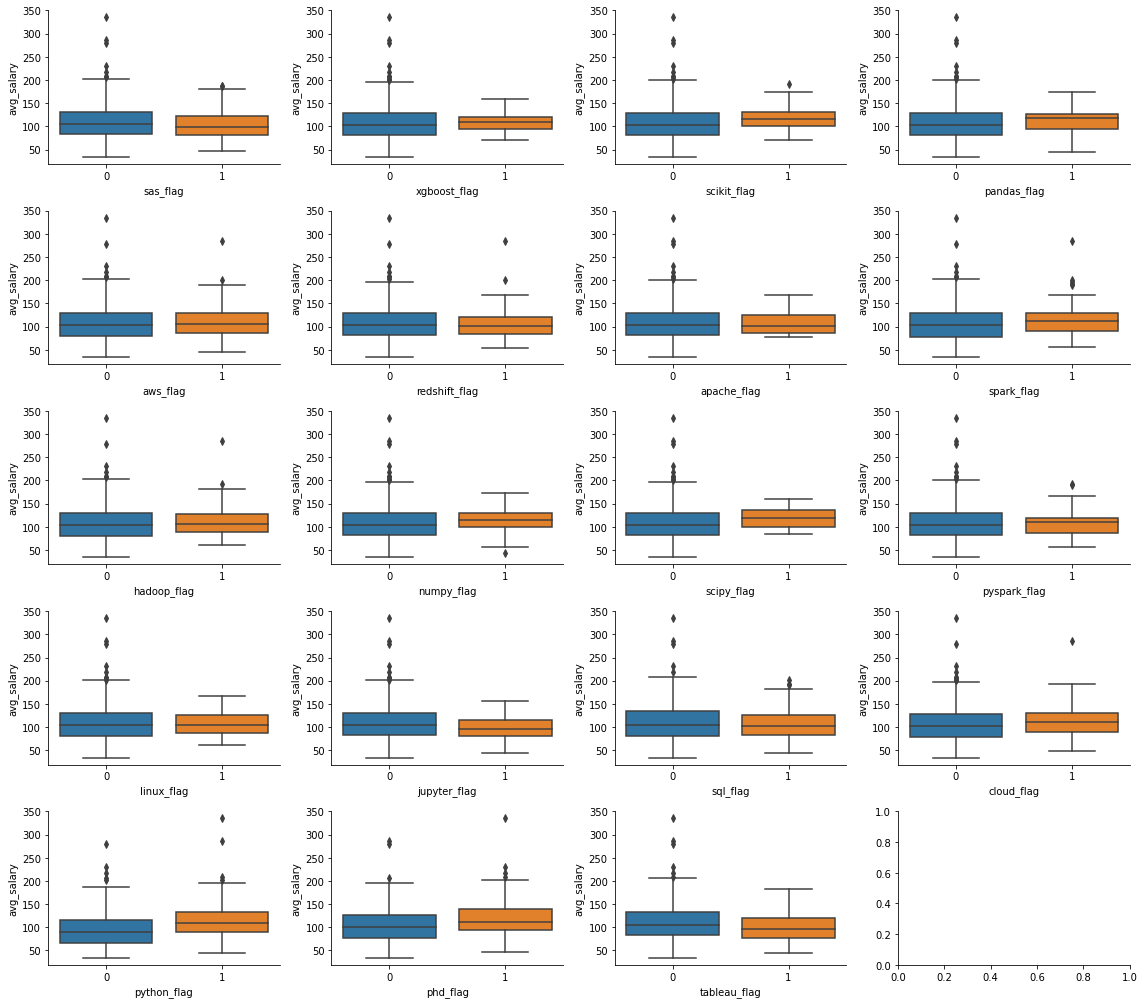

In [44]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(16,14))

for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, y='avg_salary', ax=axs[i//4,i%4])
    sns.despine()
    
fig.tight_layout()


In [46]:
df['len_description'] = df['Job Description'].apply(lambda x: len(x))

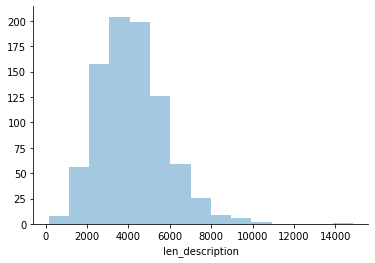

In [48]:
sns.distplot(df['len_description'], kde=False, bins=15)
sns.despine()

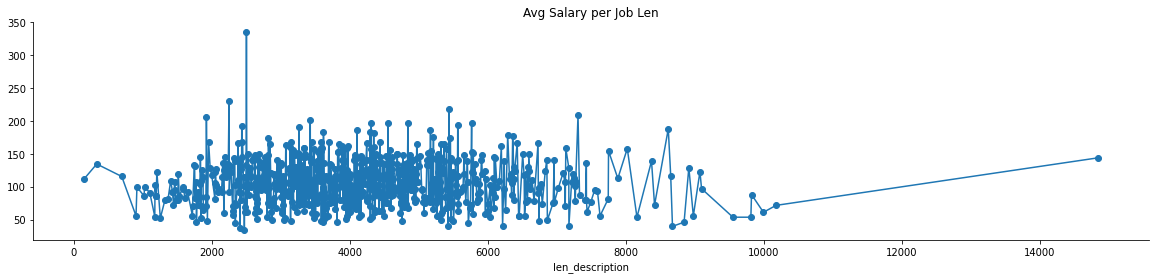

In [50]:
plt.figure(figsize=(20,4))
plt.title('Avg Salary per Job Len')
df.groupby('len_description').mean()['avg_salary'].plot(kind='line', marker='o')
sns.despine()

## Rating

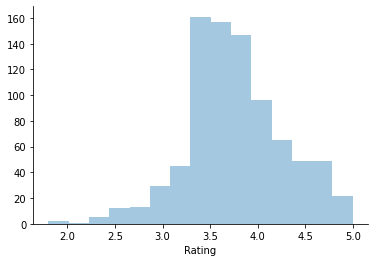

In [52]:
sns.distplot(df['Rating'], kde=False, bins=15)
sns.despine()

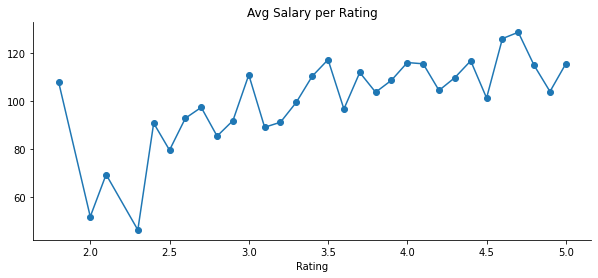

In [54]:
plt.figure(figsize=(10,4))
plt.title('Avg Salary per Rating')
df.groupby('Rating').mean()['avg_salary'].plot(kind='line', marker='o')
sns.despine()

## Location

In [56]:
df['state'] = df['Location'].apply(lambda x: x.split(',')[1].strip())
df['city'] = df['Location'].apply(lambda x: x.split(',')[0].strip())

In [58]:
print( df.state.unique(), '\n\n', df.city.unique() )

['OH' 'NC' 'NJ' 'GA' 'MA' 'DC' 'MO' 'PA' 'CA' 'MD' 'FL' 'TX' 'VA' 'RI'
 'WI' 'NM' 'NY' 'MN' 'IN' 'KS' 'CT' 'IL' 'CO' 'TN' 'ID' 'WA' 'NE' 'UT'
 'OR' 'MS' 'OK' 'NH' 'KY' 'AL' 'WY' 'AZ' 'MI' 'SC' 'DE' 'NV' 'AK' 'AR'] 

 ['Columbus' 'Morrisville' 'Piscataway' 'Atlanta' 'Cambridge' 'Washington'
 'North Kansas City' 'Akron' 'New Oxford' 'Oakdale' 'Baltimore'
 'Fort Lauderdale' 'Cedar Creek' 'Boston' 'Chantilly' 'North Kingstown'
 'Aberdeen Proving Ground' 'Framingham' 'Sheboygan' 'Milwaukee'
 'Gainesville' 'Los Alamos' 'New York' 'Arlington' 'Clearwater' 'Addison'
 'Owatonna' 'Indianapolis' 'Hauppauge' 'Danvers' 'Chevy Chase' 'Ewing'
 'Kansas City' 'McLean' 'Trumbull' 'Chicago' 'Aurora' 'Brentwood'
 'Chubbuck' 'Richland' 'San Antonio' 'Memphis' 'Fort Washington' 'Austin'
 'Miami Lakes' 'Telford' 'Poway' 'Blue Bell' 'Patuxent River' 'Evanston'
 'Mountain View' 'San Francisco' 'Omaha' 'Rockville' 'Newark' 'Wilson'
 'Fort Meade' 'Dallas' 'Fort Wayne' 'Brea' 'Frederick' 'Yakima'
 'Fort Worth' 'S

In [60]:
# Fixing
df[df['state'] == 'Los Angeles']['state'] = 'CA'

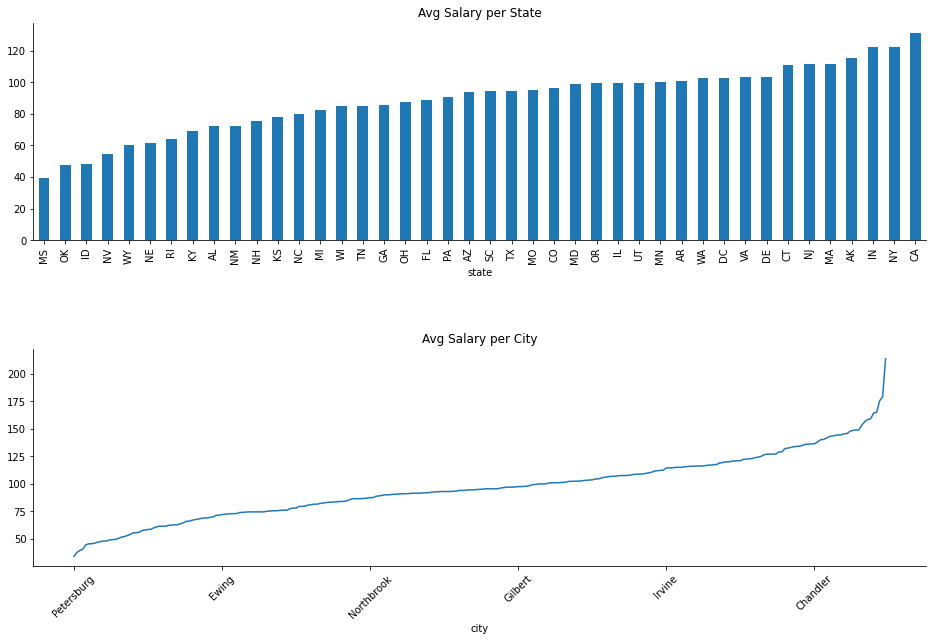

In [62]:
fig, axs = plt.subplots(2, 1, figsize=(16,10))

df.groupby(by=['state']).mean()['avg_salary'].sort_values().plot(kind='bar', ax=axs[0]);
df.groupby(by=['city']).mean()['avg_salary'].sort_values().plot(ax=axs[1], rot=45);
axs[0].set_title('Avg Salary per State');
axs[1].set_title('Avg Salary per City');
sns.despine()
plt.subplots_adjust(hspace=0.5)


## Other

In [64]:
df.groupby('Size').mean()['avg_salary'].sort_values().reset_index().set_index('Size')

,avg_salary
Size,
1 to 50 Employees,98.980769
51 to 200 Employees,101.005000
201 to 500 Employees,104.565041
1001 to 5000 Employees,105.604790
501 to 1000 Employees,107.420732
10000+ Employees,108.954064
5001 to 10000 Employees,118.282609
Unknown,129.250000


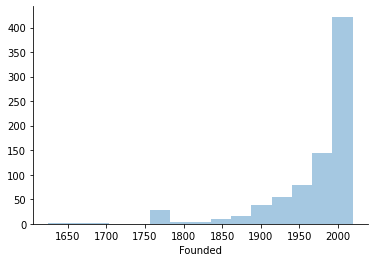

In [66]:
sns.distplot(df['Founded'], kde=False, bins=15)
sns.despine()

<AxesSubplot:title={'center':'Avg Salary per Founding Year'}, xlabel='Founded'>

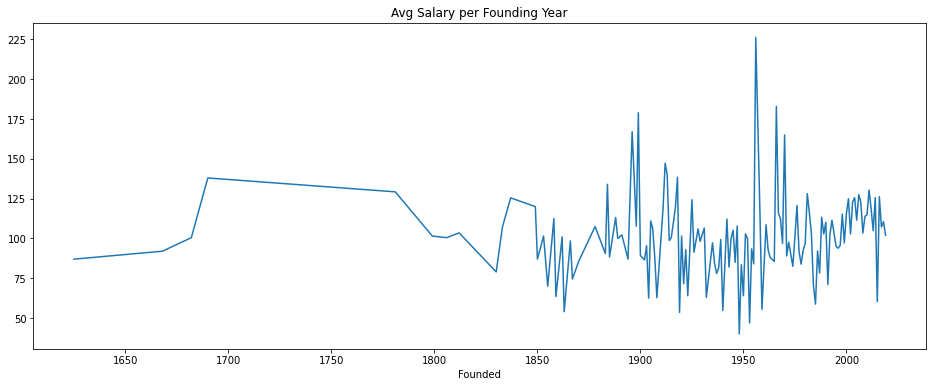

In [68]:
plt.figure(figsize=(16,6))
plt.title('Avg Salary per Founding Year')
df.groupby('Founded').mean()['avg_salary'].plot()

In [70]:
df.groupby('Type of ownership').mean()['avg_salary'].sort_values().reset_index().set_index('Type of ownership')

,avg_salary
Type of ownership,
Hospital,61.875000
Other Organization,79.500000
College / University,84.666667
Nonprofit Organization,96.673913
Government,97.200000
Subsidiary or Business Segment,98.732759
Company - Private,106.144444
Contract,109.500000
Company - Public,113.344311


In [72]:
df.groupby('Sector').mean()['avg_salary'].sort_values().reset_index().set_index('Sector')

,avg_salary
Sector,
Mining & Metals,55.000000
Agriculture & Forestry,74.500000
Non-Profit,78.750000
Education,84.318182
Health Care,86.450000
Telecommunications,87.333333
"Construction, Repair & Maintenance",92.250000
"Oil, Gas, Energy & Utilities",92.428571
Business Services,94.863248


In [74]:
df.groupby('Revenue').mean()['avg_salary'].sort_values().reset_index().set_index('Revenue')

,avg_salary
Revenue,
$25 to $50 million (USD),87.267442
$50 to $100 million (USD),93.212766
$5 to $10 million (USD),97.625000
Less than $1 million (USD),98.500000
$500 million to $1 billion (USD),100.847826
$2 to $5 billion (USD),101.284314
$10 to $25 million (USD),105.515625
$100 to $500 million (USD),105.665179
Unknown / Non-Applicable,108.737500


<AxesSubplot:>

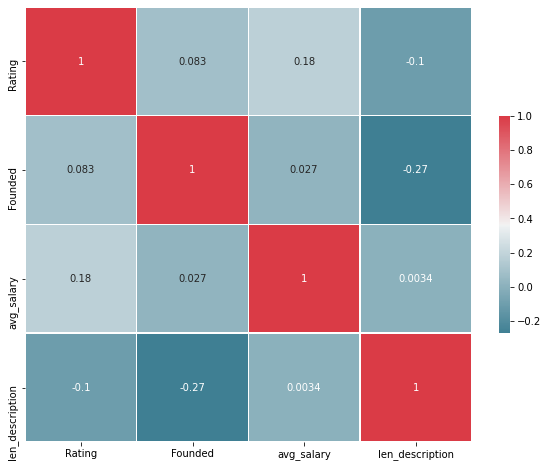

In [76]:
corr = df[['Rating', 'Founded', 'avg_salary', 'len_description']].corr()
plt.figure(figsize=(10,8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

## Export Data

In [78]:
df.to_csv('glassdoor_data_eda.csv', index=False)